In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

    

Text(0.5, 1.0, 'XOR data')

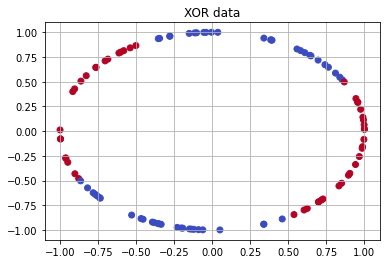

In [2]:
# XOR data
num_data = 100
num_test = 100
XOR_X = 2*np.random.rand(num_data, 2)-1
XOR_X = np.array([x/np.linalg.norm(x) for x in XOR_X])
XOR_rot_y = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_X.T).T])
XOR_Xtest = 2*np.random.rand(num_test, 2)-1
XOR_rot_ytest = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_Xtest.T).T])
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.grid()
plt.title('XOR data')

In [3]:
C = 1e1
X = XOR_X
y = XOR_rot_y
Y = np.array([y]).T
Q = matrix(Y @ Y.T * np.abs(X @ X.T)**2)
p = matrix(-np.ones(y.size))
G = matrix(np.vstack([-np.identity(y.size), np.identity(y.size)]))

h = matrix(np.hstack([np.zeros(y.shape), C*np.ones(y.shape)]))

sol = solvers.qp(Q, p, G, h)

pcost       dcost       gap    pres   dres
 0:  3.8415e+01 -3.8012e+03  7e+03  3e-01  5e-15
 1:  9.7938e+01 -5.0780e+02  7e+02  2e-02  4e-15
 2: -1.3013e+01 -1.7450e+02  2e+02  3e-03  3e-15
 3: -5.1088e+01 -1.2120e+02  7e+01  1e-03  3e-15
 4: -6.9960e+01 -9.1668e+01  2e+01  1e-04  4e-15
 5: -7.3605e+01 -9.0974e+01  2e+01  6e-05  4e-15
 6: -7.7723e+01 -8.5929e+01  8e+00  3e-05  5e-15
 7: -7.9121e+01 -8.3919e+01  5e+00  8e-06  4e-15
 8: -7.9570e+01 -8.3483e+01  4e+00  4e-06  4e-15
 9: -8.1057e+01 -8.1588e+01  5e-01  1e-08  5e-15
10: -8.1316e+01 -8.1328e+01  1e-02  2e-10  6e-15
11: -8.1322e+01 -8.1322e+01  1e-04  2e-12  6e-15
12: -8.1322e+01 -8.1322e+01  1e-06  2e-14  4e-15
Optimal solution found.


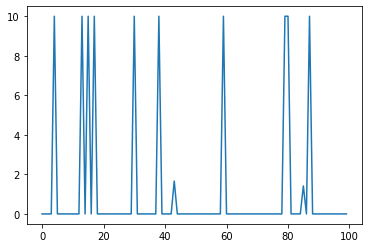

In [4]:
plt.plot(sol['x'])

Text(0.5, 1.0, 'XOR data')

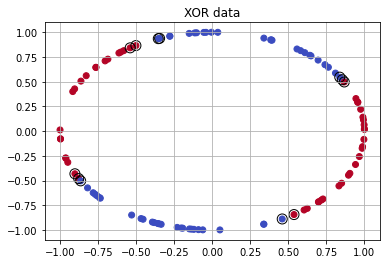

In [5]:
svi = (np.array(sol['x'])>=np.mean(np.array(sol['x']), axis=0)).reshape(-1)
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

In [6]:
np.ravel(sol['x'])

array([8.26983625e-09, 5.48590089e-09, 1.84322878e-09, 7.48092854e-09,
       9.99999999e+00, 6.90004142e-09, 1.80347319e-09, 2.86203031e-09,
       1.19864311e-08, 1.82774201e-09, 1.72119447e-09, 1.70132159e-09,
       5.02444145e-08, 9.99999999e+00, 7.91098686e-09, 9.99999956e+00,
       1.68028167e-09, 1.00000000e+01, 1.53945430e-09, 1.81256066e-09,
       5.99780352e-09, 2.23145909e-09, 3.69855616e-08, 1.67411405e-09,
       1.01970356e-08, 2.30034511e-09, 8.30442956e-09, 2.00996560e-09,
       2.49563250e-09, 9.98039118e-09, 9.99999999e+00, 2.15085406e-09,
       2.25995849e-09, 5.47981010e-09, 5.16780865e-09, 2.43382097e-09,
       3.20037039e-09, 1.53336439e-09, 9.99999999e+00, 1.66567763e-09,
       3.58016564e-09, 6.39514377e-09, 1.47692841e-09, 1.66213188e+00,
       1.03316182e-08, 2.45163547e-09, 2.73375253e-09, 2.46301134e-09,
       1.83663593e-09, 1.10730886e-08, 3.69416935e-09, 1.97916266e-09,
       2.93461643e-09, 2.06337442e-09, 4.16969225e-08, 1.66994894e-09,
      

In [7]:
from classification.classifier import SVM
from classification.optimizer import CVXOPT
cls = SVM(XOR_X, XOR_rot_y)
cls.optimize(CVXOPT, C=10)

pcost       dcost       gap    pres   dres
 0:  3.8415e+01 -3.8012e+03  7e+03  3e-01  5e-15
 1:  9.7938e+01 -5.0780e+02  7e+02  2e-02  4e-15
 2: -1.3013e+01 -1.7450e+02  2e+02  3e-03  3e-15
 3: -5.1088e+01 -1.2120e+02  7e+01  1e-03  3e-15
 4: -6.9960e+01 -9.1668e+01  2e+01  1e-04  4e-15
 5: -7.3605e+01 -9.0974e+01  2e+01  6e-05  4e-15
 6: -7.7723e+01 -8.5929e+01  8e+00  3e-05  5e-15
 7: -7.9121e+01 -8.3919e+01  5e+00  8e-06  4e-15
 8: -7.9570e+01 -8.3483e+01  4e+00  4e-06  4e-15
 9: -8.1057e+01 -8.1588e+01  5e-01  1e-08  5e-15
10: -8.1316e+01 -8.1328e+01  1e-02  2e-10  6e-15
11: -8.1322e+01 -8.1322e+01  1e-04  2e-12  6e-15
12: -8.1322e+01 -8.1322e+01  1e-06  2e-14  4e-15
Optimal solution found.


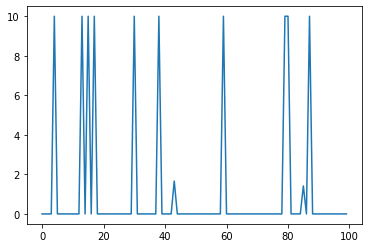

In [8]:
sol = cls.opt_dict
plt.plot(sol['x'])

Text(0.5, 1.0, 'XOR data')

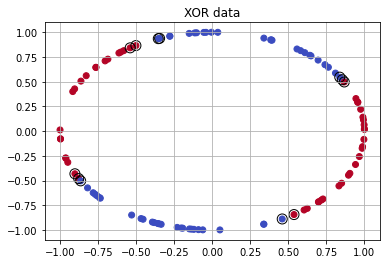

In [9]:
svi = cls.support_vector_index
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

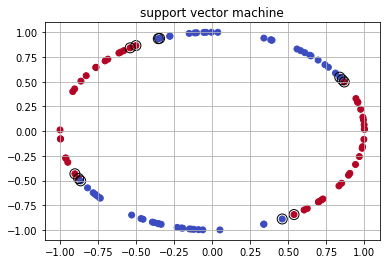

In [10]:
cls.plot()

In [11]:
cls.classify(X)==XOR_rot_y

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [12]:
cls.check_perfomance(XOR_Xtest, XOR_rot_ytest)

0.99

In [18]:
A=int(np.ceil(np.log2(3)))